script to compare the hindcasts (May) with the system 8 for SST

### Input parameters and libraries

In [1]:
#import matplotlib
#matplotlib.use('Agg') # to run on aneto (not very useful for this script)
from function_read import * # some auxiliary functions that I wrote to read the file
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import scipy.stats
import cartopy as cart
import cartopy.crs as ccrs
from function_read import *
from mpl_toolkits.axisartist.axislines import Subplot 
import sys

# name of the experience
exp="dcppA-hincast"


#period to analyse
year1=1998
year2=2014
#number of months of the hindcast to read
nmon=6
#number of members (to select the same number of member in Sys8 and the hindcast)
nmemb=10
#starting month of the hindcast (may:5 or November:11)
monstart=5

lat_bnds = [-90,90]
lon_bnds = [-180,179]
varname="tos"

# define the target season to compute the skill, seas=(6,8) for JJA
seas=(6,8)


In [2]:
#compute dates from year1 and year2
nyear=year2-year1+1
yearlst=np.arange(year1, year2+1)
sdatelst=[]
for year in yearlst:
    sdatelst.append(date(year=year, month=monstart, day=1))

### Read files: hindcasts

In [4]:
# list to be converted in array to store the data
varMM=[]
# list to store the missing members
# additional comment: in the test simulation I was investigating a few members where missing; I replace them
# by the members 5 this should be remove when the dataset will be complete
missing=[]
#loop over members
for imemb in range(1,nmemb+1):
    moddate=[]
    # loop over start dates
    for s in sdatelst:
        f=glob("/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-hindcast/*r%ii2p1f2/"%imemb+varname+"*"+s.strftime("%Y%m")+"*")
        # as said before if the member is missing use the member 5 (to be removed with a complete dataset)
        if len(f)==0:
            print(f)
            f=glob("/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-hindcast/*r%ii2p1f2/"%(5)+varname+"*"+s.strftime("%Y%m")+"*")
            missing.append((imemb, s))
          
        #interpolation to 1x1 degree grid 
        f=cdo.remapbil("r360x180", input=f[0])
            
        varf=netCDF4.Dataset(f)
        #extract array from fonction read (the fonction would need adaptation to work directly on the NEMO grid)
        mod, latobs, lonobs  = extract_array(varf, varname, nmon, lon_bnds, lat_bnds)
        moddate.append(mod)
    #store data    
    varMM.append(np.array(moddate))
    print(np.array(moddate).shape)

#convert in numpy array
varMM=np.array(varMM)

all
True [-180  179]
3
(6, 180, 360)
all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
[]


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
[]


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
[]


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
[]


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)
(17, 6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


### Read files: system8

In [5]:
# list to be converted in array to store the data
varMMS7=[]
for imemb in range(1,nmemb+1):
    membstr="E%03d"%imemb
    moddate=[]
    for s in sdatelst:
        #hindcasts from system 8 HE: May startdate HK: November
        #f=glob("/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/sys8/series/ts/HE/PASTEL_H"+s.strftime("%Y")+membstr+"*6hourly_ts_"+s.strftime("%Y")+"*")
        f=glob("/cnrm/pastel/DATA/sys8/series/ts/HE/PASTEL_H"+s.strftime("%Y")+membstr+"*6hourly_ts_"+s.strftime("%Y")+"*")
        
        #remove lasts days of April (present due to the lagged initialisation stategy)
        #to gain time the monthly data could be stored somewhere
        f=cdo.monmean(input="-selmon,5,6,7,8,9,10 "+f[0])
        f=cdo.remapbil("r360x180", input=f)
        
        varf=netCDF4.Dataset(f)
        #extract array from fonction read 
        mod, latobs, lonobs  = extract_array(varf, "ts", nmon, lon_bnds, lat_bnds, level="all")
        moddate.append(mod)
        
    varMMS7.append(np.array(moddate))
    
varMMS7=np.array(varMMS7)

all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


all
True [-180  179]
3
(6, 180, 360)


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


### Read files: observations

In [6]:
fileobs = "/cnrm/pastel/USERS/prodhommec/NO_SAVE/obs/ersst-v4_185401-201612.nc"
fileobs=cdo.remapbil("r360x180", input=fileobs)
varfobs=netCDF4.Dataset(fileobs)
obs, latobs, lonobs  = extract_array(varfobs, "sst", (yearlst[-1]-1854+1)*12, lon_bnds, lat_bnds, level="all")
varfobs.close()
obs = obs[((yearlst[0]-1854)*12):,0,:,:]
ntime, nlat, nlon = obs.shape

all
True [-180  179]
4


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


(1932, 1, 180, 360)


### Analysis

In [8]:
# transform obervation to have data organized following (nyear, 12, nlon, nlat)
indexobsresh = obs.reshape((year2-year1+1),12, nlat, nlon)


#compute climatologies
climmod=np.mean(varMM, axis=(0,1))
climmodS7=np.mean(varMMS7, axis=(0,1))
climobs = np.mean(indexobsresh, axis = 0)

#compute climatologies for the target season
climmodseas=np.mean(climmod[(seas[0]-monstart):(seas[1]-monstart+1), : ,:], axis=(0))
climmodS7seas=np.mean(climmodS7[(seas[0]-monstart):(seas[1]-monstart+1), : ,:], axis=(0))
climobsseas = np.mean(climobs[(seas[0]-1):(seas[1]), : ,:], axis=(0))


#compute anomalies 
#additional note: This should be done in cross-validation for this preliminary analysis it's not done
anom = varMM-extend_table(climmod, [1, (year2-year1+1)])
anomobs = indexobsresh - climobs
anomseas=np.mean(anom[:, :, (seas[0]-monstart):(seas[1]-monstart+1),:,:], axis=(0,2))
anomobsseas=np.mean(anomobs[:,(seas[0]-1):(seas[1]),:,:], axis=1)
anomS7 = varMMS7-extend_table(climmodS7, [1, (year2-year1+1)])
anomseasS7=np.mean(anomS7[:, :, (seas[0]-monstart):(seas[1]-monstart+1),:,:], axis=(0,2))


In [9]:


corr=np.array([[scipy.stats.pearsonr(anomseas[:,ilat, ilon],anomobsseas[:,ilat, ilon]) for ilon in range(nlon)] for ilat in range(nlat)])           
corrS7=np.array([[scipy.stats.pearsonr(anomseasS7[:,ilat, ilon],anomobsseas[:,ilat, ilon]) for ilon in range(nlon)] for ilat in range(nlat)])           
                 

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in float_scalars
  r = r_num / r_den


### Plots

In [11]:
from mpl_toolkits.axisartist.axislines import Subplot 
import matplotlib.colors as colors
from matplotlib import ticker, cm
import cartopy
import cartopy.crs as ccrs

def PlotField(ax, field, lons, lats, colorbar, title, levs, norm, signi=False, signifield=None, extend="neither"):
    lons[lons>180]=lons[lons>180]-360                                                                                                                                                                           
    #ax = plt.axes(projection=cart.crs.Robinson())                                                                                                                                                               
    #ax.coastlines()                                                                                                                                                                                             
    ax.set_title(title)
    #lons_reg=np.array(list(lons)+[71, 72, 73, 74])                                                                                                                                                              
    #field=np.ma.concatenate((field, field[:,-4:]), axis=1)                                                                                                                                                      
    #field[field<0]=0                                                                                                                                                                                            
    # Alternatively, you can manually set the levels                                                                                                                                                             
    # and the norm:                                                                                                                                                                                              
    mesh = ax.pcolormesh(lons, lats, np.ma.array(field, mask=field>1e19), cmap=colorbar,
                     transform=ccrs.PlateCarree(),
                         norm=norm, 
                         shading="flat")
    if signi:
        lon2d, lat2d = np.meshgrid(lons, lats)
        ax.scatter(lon2d[signifield], lat2d[signifield], cmap=colorbar,
                     transform=ccrs.PlateCarree(), s=0.005, c="black")
    ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
    #ax.set_extent((lon_bnds[0],lon_bnds[1],lat_bnds[0],lat_bnds[1]),crs=ccrs.PlateCarree(central_longitude=71),)                                                                                                
    # cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())                                                                                                                                                     
    #plot = ax.contourf(lons, lats, field, levs, transform=cartopy.crs.PlateCarree(), cmap=colorbar, norm=norm)                                                                                                  
    #ax.add_feature(cartopy.feature.LAND,zorder=100, edgecolor='k')                                                                                                                                              
    return(mesh)



<Figure size 432x288 with 0 Axes>

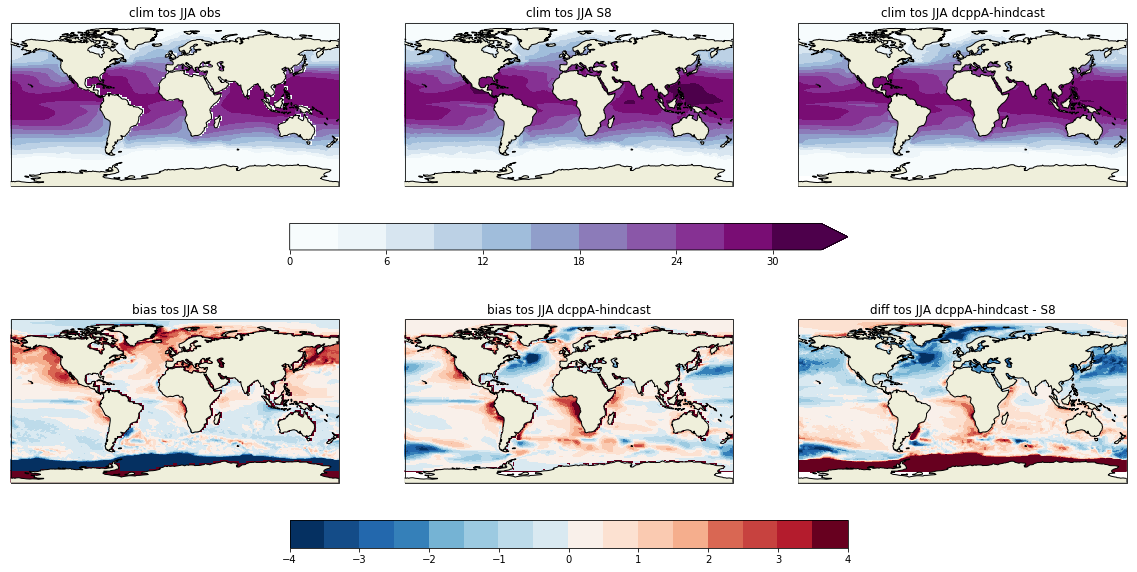

In [12]:
nline=2
ncol=3 #len(varnamelst)


#fig = plt.figure(figsize=(20, 20))                                                                     
#fig.tight_layout(pad=0)                                                                                
fig = plt.figure()
fig.tight_layout()

fig, axs = plt.subplots(ncols=ncol, nrows=nline, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 10))
#cmap = colors.ListedColormap(["yellow", "green", "cyan", "blue", "purple", 'red', 'darkred', 'blue', 'cyan'])
#cmap.set_over('0.25')
#cmap.set_under('0.75')
cmap = cm.get_cmap('BuPu', 20)

bounds = np.arange(0,35, 3)
norm = colors.BoundaryNorm(bounds, cmap.N, clip=False)



mesh = PlotField(axs[0,0], climobsseas, lonobs, latobs,cmap, "clim tos JJA obs", bounds, norm, extend="max")

mesh = PlotField(axs[0,1], climmodS7seas, lonobs, latobs,cmap, "clim tos JJA S8", bounds, norm, extend="max")

mesh = PlotField(axs[0,2], climmodseas, lonobs, latobs,cmap, "clim tos JJA dcppA-hindcast", bounds, norm, extend="max")
fig.colorbar(mesh, orientation="horizontal", ax=axs[0], shrink=0.5, spacing="proportional", extend="max")


cmap = cm.get_cmap('RdBu_r', 20)

bounds = np.arange(-4,4.5, 0.5)
norm = colors.BoundaryNorm(bounds, cmap.N, clip=False)


mesh = PlotField(axs[1,0], climmodS7seas-climobsseas, lonobs, latobs,cmap, "bias tos JJA S8", bounds, norm)

mesh = PlotField(axs[1,1], climmodseas-climobsseas, lonobs, latobs,cmap, "bias tos JJA dcppA-hindcast", bounds, norm)

mesh = PlotField(axs[1,2], climmodseas-climmodS7seas, lonobs, latobs,cmap, "diff tos JJA dcppA-hindcast - S8", bounds, norm)
fig.colorbar(mesh, orientation="horizontal", ax=axs[1], shrink=0.5, spacing="proportional")


    
            #if ivar<nvar:                                                                              




# In[28]:ftime("%b") for s in modsdatelst], clims7, color="darkgreen")


In [16]:
figdir="/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/plot/Skill/"
figname=figdir+("ClimMaps"+"_"+exp+"_monstart-%i_"%monstart+varname)
figname=(figname+".pdf")

print(figname)
fig.savefig(figname)

/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/plot/Skill/ClimMaps_dcppA-hincast_monstart-5_tos.pdf


<Figure size 432x288 with 0 Axes>

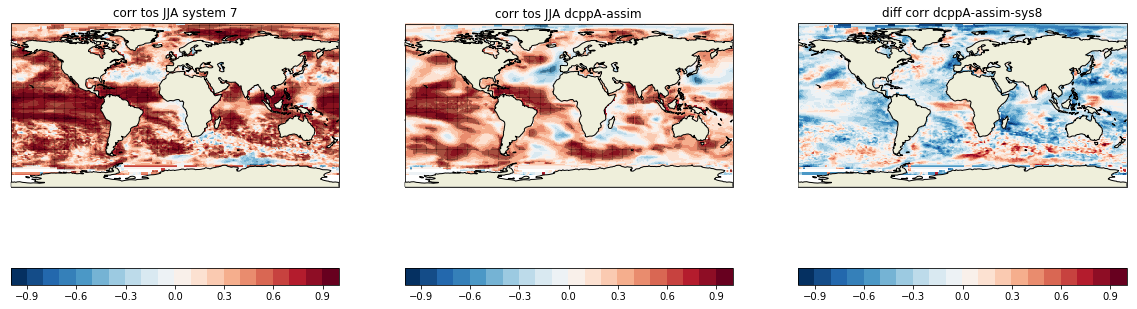

In [17]:
# In[31]:
nline=1
ncol=3 #len(varnamelst)


#fig = plt.figure(figsize=(20, 20))                                                                     
#fig.tight_layout(pad=0)                                                                                
fig = plt.figure()
fig.tight_layout()

fig, axs = plt.subplots(ncols=ncol, nrows=nline, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 10))
#cmap = colors.ListedColormap(["yellow", "green", "cyan", "blue", "purple", 'red', 'darkred', 'blue', 'cyan'])
#cmap.set_over('0.25')
#cmap.set_under('0.75')
cmap = cm.get_cmap('RdBu_r', 20)

bounds = np.arange(-10,11)/10.
norm = colors.BoundaryNorm(bounds, cmap.N, clip=False)



mesh = PlotField(axs[0], corrS7[:,:,0], lonobs, latobs,cmap, "corr tos JJA system 7", bounds, norm,
                signi=True, signifield=corrS7[:,:,1]<0.05)
fig.colorbar(mesh, orientation="horizontal", ax=axs[0], shrink=1, spacing="proportional")



mesh = PlotField(axs[1], corr[:,:,0], lonobs, latobs,cmap, "corr tos JJA dcppA-assim", bounds, norm,
                signi=True, signifield=corr[:,:,1]<0.05)
fig.colorbar(mesh, orientation="horizontal", ax=axs[1], shrink=1, spacing="proportional")
    

mesh = PlotField(axs[2], corr[:,:,0]-corrS7[:,:,0], lonobs, latobs,cmap, "diff corr dcppA-assim-sys8", bounds, norm)
fig.colorbar(mesh, orientation="horizontal", ax=axs[2], shrink=1, spacing="proportional")
       
    
            #if ivar<nvar:                                                                              




# In[28]:

In [18]:
figdir="/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/plot/Skill/"
figname=figdir+("CorrMaps"+"_"+exp+"_monstart-%i_"%monstart+varname)
figname=(figname+".pdf")

print(figname)
fig.savefig(figname)

/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/plot/Skill/CorrMaps_dcppA-hincast_monstart-5_tos.pdf


In [ ]:
climmodS7.shape